<h1>Global Warming in Louisville KY <h2>
<img alt="Global Warming Image title="Sick Earth" src="images/global warming.png"/>

This cell imports packages needed to run the below code.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import csv
import numpy as np

 
<h2> 1. Read data in.</h2>
The below cell Reads in a csv file.
<br> 
I then printed the header row and number of rows in the csv file. 

In [2]:
df = pd.read_csv (r'data.csv')
filename = 'data.csv'
with open('data.csv') as f:
    reader = csv.reader(f)
    header_row = next(reader)
#To display the headers of the csv file and verify it imported correctly.
print("This is the imported data.csv header", '\n' , header_row)
# Displays the total rows in the csv file
print("This is the total number of rows in the file:", len(df))

This is the imported data.csv header 
 ['STATION ID', 'STATION NAME', 'DATE', 'DAILY AVG TEMP (DEG F)', 'DAILY MAX TEMP (DEG F)', 'DAILY MIN TEMP (DEG F)', 'DAILY PRECIPITATION TOTAL (INCHES)']
This is the total number of rows in the file: 27184


<h2> 2. Manipulate and clean your data.  </h2>
<br>
The first block of code calculates some basic stats on the daily weather. 
The second chunk of code removes NaN values in the DAILY PRECIPITATION TOTAL (INCHES) column and replaces them with 0's. 
The last section made a new column to show true or false vales, if the max temp value has been recorded more than once. 

In [3]:
print("The Max Temp (F) between 1948 to 2022 is :", df['DAILY MAX TEMP (DEG F)'].max())
print("The lowest Max Temp (F) between 1948 to 2022 is :", df['DAILY MAX TEMP (DEG F)'].min())
print("The lowest Temp (F) between 1948 to 2022 is :", df['DAILY MIN TEMP (DEG F)'].min())
print("The highest, low Temp (F) between 1948 to 2022 is :", df['DAILY MIN TEMP (DEG F)'].max())
print("This is the average precipitation in inches:", df['DAILY PRECIPITATION TOTAL (INCHES)'].mean())
print("This is the highest precipitation in inches in a day:", df['DAILY PRECIPITATION TOTAL (INCHES)'].max())

# This replaces the Nan values to 0 
df['DAILY PRECIPITATION TOTAL (INCHES)'] = df['DAILY PRECIPITATION TOTAL (INCHES)'].fillna(0)
# print("This removed the NaN values in the Perc Column.", '\n', df.head(10))

#This shows the duplicates in the max temp as true or false in a new column 
df['Max temps duplicated'] = df.duplicated('DAILY MAX TEMP (DEG F)')
df['Max temps duplicated'].sum()
# print(df.head(9))

The Max Temp (F) between 1948 to 2022 is : 106.0
The lowest Max Temp (F) between 1948 to 2022 is : 1.0
The lowest Temp (F) between 1948 to 2022 is : -22.0
The highest, low Temp (F) between 1948 to 2022 is : 83.0
This is the average precipitation in inches: 0.12537516099356025
This is the highest precipitation in inches in a day: 7.22


27078

<h2>3. Analyze your data! </h2>
<br>
I split up the data.csv sheet into months to learn how to import and work with several data sets.  
<br><br>
First section of code assigns a month to the sheet on import. This was done to save space and combine functions. 
<br><br>
I then made a list of the months, being the imports from above. This makes it easier to call from later. 
<br><br>
Next I have a dictionary that will be my values for the graph in the end. The list names are the column headers which is problimatic on the graph later for readability. Ideally The column headers would have been 50's, 60's ect
<br><br>
The next section is another for loop. It goes sheet to sheet ane obtains the avereages from each decade for the ys.It then appends, averages, and rounds them to the second decimal places. 
<br> <br>
The final loop prints the vales for the "Ys" dictionary, which are I copied and updated the dictionary values so that it would read easier. 

In [4]:
# imports the data sets and assigns them to month
jan = pd.read_csv (r'./months_csv/jan.csv')
feb = pd.read_csv (r'./months_csv/feb.csv')
March = pd.read_csv (r'./months_csv/March.csv')
april = pd.read_csv (r'./months_csv/april.csv')
may = pd.read_csv (r'./months_csv/may.csv')
june = pd.read_csv (r'./months_csv/june.csv')
july = pd.read_csv (r'./months_csv/july.csv')
aug = pd.read_csv (r'./months_csv/aug.csv')
sept = pd.read_csv (r'./months_csv/sept.csv')
oct = pd.read_csv (r'./months_csv/oct.csv')
nov = pd.read_csv (r'./months_csv/nov.csv')
dec = pd.read_csv (r'./months_csv/dec.csv')


months = [jan, feb, March, april, may, june, july, aug, sept, oct, nov, dec]

ys = {
    'fifties': [], 
    'sixties': [],
    'seventies': [],
    'eighties': [],
    'nineties': [],
    'twok': [],
    'twenty ten': [],
    }

for month in months:
    for decade in ys:
        ys[decade].append(round(month[decade].mean(), 2))

# x axis values 
# x = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sept", "Oct", "Nov", "Dec", ]
 
# # plotting the points  
for y in ys:
#   plt.plot(x, ys[y], label=y)
  print('For Decade: ', y, " Values: ", ys[y])

# plt.legend()

    
# # naming the x axis 
# plt.xlabel('Months')

# # naming the y axis 
# plt.ylabel('Temperature') 
   
# # giving a title to my graph 
# plt.title('Average Temputures by Decade') 
    
# # function to show the plot 
# plt.show() 


For Decade:  fifties  Values:  [35.85, 38.9, 44.57, 56.72, 66.6, 75.04, 78.68, 77.02, 70.17, 58.46, 44.39, 37.39]
For Decade:  sixties  Values:  [32.02, 34.31, 43.83, 56.62, 64.86, 72.87, 76.62, 75.35, 68.44, 57.36, 45.91, 34.76]
For Decade:  seventies  Values:  [30.4, 35.35, 46.96, 56.69, 65.15, 73.58, 77.03, 76.2, 70.3, 57.58, 46.96, 38.57]
For Decade:  eighties  Values:  [32.2, 36.29, 46.24, 56.17, 65.92, 74.29, 78.94, 77.18, 69.91, 57.82, 47.89, 36.17]
For Decade:  nineties  Values:  [35.9, 40.27, 46.88, 56.81, 66.43, 75.02, 79.24, 77.18, 69.99, 59.19, 47.49, 39.39]
For Decade:  twok  Values:  [35.6, 38.52, 48.38, 58.92, 67.16, 75.57, 78.15, 78.89, 71.37, 59.5, 49.13, 37.58]
For Decade:  twenty ten  Values:  [34.45, 38.98, 48.49, 60.2, 69.99, 77.44, 80.58, 79.05, 73.21, 60.96, 47.56, 40.97]


<h2> 4. Visualize your data. </h2>
<br>
The final plot to show the change over time is below. Followed by the coldest and hottest months to show the difference. This also completed the 2 part visual requirement.

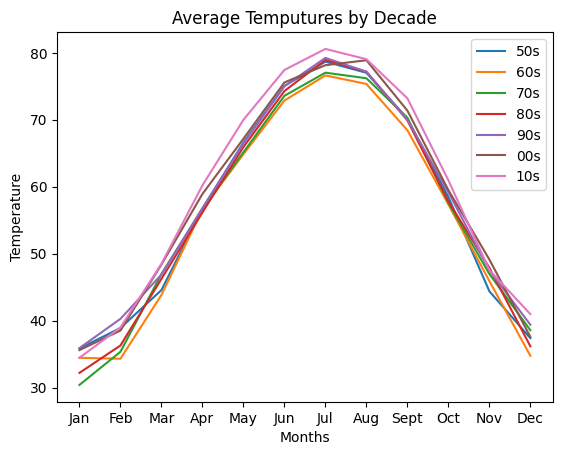

In [5]:
# x axis values 
x = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sept", "Oct", "Nov", "Dec", ]

# corresponding y axis values 
ys = {
  "50s": [35.85,  38.90, 44.57, 56.72, 66.60, 75.04, 78.68, 77.02, 70.17, 58.46, 44.39, 37.39],
  "60s": [34.45, 34.31, 43.83, 56.62, 64.86, 72.87, 76.62, 75.35, 68.44, 57.36, 45.91, 34.76],
  "70s": [30.4, 35.35, 46.96, 56.69, 65.15, 73.58, 77.03, 76.20, 70.30, 57.58, 46.97, 38.57],
  "80s": [32.2, 36.29, 46.24, 56.16, 65.92, 74.29, 78.94, 77.18, 69.91, 57.82, 47.89, 36.17],
  "90s": [35.9, 40.27, 46.88, 56.81, 66.43, 75.02, 79.24, 77.18, 69.99, 59.19, 47.49, 39.39],
  "00s": [35.6, 38.52, 48.38, 58.92, 67.16, 75.57, 78.15, 78.89, 71.37, 59.50, 49.13, 37.58],
  "10s": [34.45, 38.98, 48.49, 60.2, 69.99, 77.44, 80.58, 79.05, 73.21, 60.96, 47.56, 40.97],
} 
 
# plotting the points  
for y in ys:
  plt.plot(x, ys[y], label=y)
  # print('For Decade: ', y, "   Values: ", ys[y])

# plt.plot(x, y["five"], "", label="50s")
# plt.plot(x, y["six"], "", label="60s")
# plt.plot(x, y["seven"], "", label="70s",)
# plt.plot(x, y["eight"], "", label="80s",)
# plt.plot(x, y["nine"], "", label="90s",)
# plt.plot(x, y["twok"], "", label="00s",)
# plt.plot(x, y["ten"], "", label="10s",)


plt.legend()

    
# naming the x axis 
plt.xlabel('Months')

# naming the y axis 
plt.ylabel('Temperature') 
   
# giving a title to my graph 
plt.title('Average Temputures by Decade') 
    
# function to show the plot 
plt.savefig("images/avgtemp_graph.jpg", bbox_inches="tight")
plt.show() 



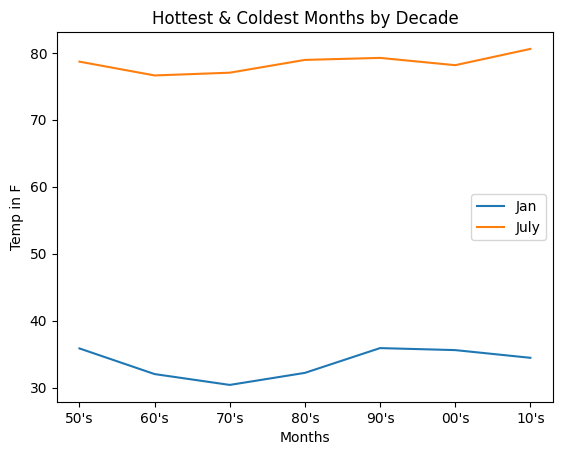

In [6]:
# graph showing the hottest and coldest months of the year

# x axis values 
x = ["50's","60's", "70's", "80's", "90's", "00's", "10's"] 

# corresponding y axis values 
ys = {
    "Jan" : [35.85, 32.02, 30.40, 32.20, 35.90, 35.60, 34.45],
    "July" : [78.68, 76.62, 77.03, 78.94, 79.24, 78.15, 80.58],
} 
 

for y in ys:
  plt.plot(x, ys[y], label=y)
  # print('For Month: ', y, "   Values: ", ys[y])

plt.legend()

    
# naming the x axis 
plt.xlabel('Months')

# naming the y axis 
plt.ylabel('Temp in F') 
   
# giving a title to my graph 
plt.title('Hottest & Coldest Months by Decade') 
    
# function to show the plot 
plt.show() 